# Extracting the data from Google Drive

In [ ]:
!gdown --id '1l5a4vQjsO11eCHL_nSojoRz_JY9JGMNZ'

In [ ]:
!unzip rice_data.zip -d ./

# Creating the Dataset and Dataloader

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import os

In [ ]:
DATA_PATH = 'Rice_Image_Dataset/'

In [ ]:
labels_list = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [ ]:
def get_images(path):
    paths = []
    if(os.path.isdir(path)):
        for child in os.listdir(path):
             paths += get_images(path + os.path.sep + child)
    else:
         label = path.split(sep='/')[-2]
         if label != '':
            return [(path, labels_list.index(label))]
   
    return paths

In [ ]:
images = get_images(DATA_PATH)

In [ ]:
class RiceDataset(Dataset):
    def __init__(self, image_dir, transform=None, target_transform=None):
        self.image_dir = image_dir
        self.images = get_images(self.image_dir)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx][0]
        image = read_image(img_path)
        label = self.images[idx][1]
        
        
        if self.transform:
            image = self.transform(image)


        return image.float(), label

In [ ]:
rice_data = RiceDataset(DATA_PATH)
rice_data.__len__()

75000

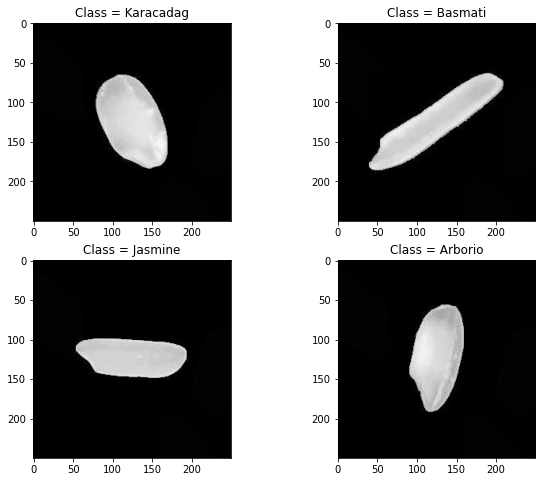

In [ ]:
visualization_data = []

for i in range(4):
    rice_item = rice_data.__getitem__(15000 * i)
    visualization_data.append(rice_item)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title(f"Class = {labels_list[visualization_data[0][1]]}")
plt.imshow(visualization_data[0][0].cpu().numpy()[0], cmap='gray')

plt.subplot(2, 2, 2)
plt.title(f"Class = {labels_list[visualization_data[1][1]]}")
plt.imshow(visualization_data[1][0].cpu().numpy()[0], cmap='gray')

plt.subplot(2, 2, 3)
plt.title(f"Class = {labels_list[visualization_data[2][1]]}")
plt.imshow(visualization_data[2][0].cpu().numpy()[0], cmap='gray')

plt.subplot(2, 2, 4)
plt.title(f"Class = {labels_list[visualization_data[3][1]]}")
plt.imshow(visualization_data[3][0].cpu().numpy()[0], cmap='gray')
plt.show();

In [ ]:
from torch.utils.data import DataLoader, random_split

train_size = int(0.7 * rice_data.__len__())
test_size = rice_data.__len__() - train_size

train_data, test_data = random_split(rice_data, [train_size, test_size])


train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Importing model

In [ ]:
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU")
else:
    device = torch.device("cpu")
    print("CPU")

GPU


In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 5)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_ft.parameters(),lr=0.001)
n_steps = len(train_dataloader)
num_epochs = 15

# Training

In [ ]:
def show_losses(losses):
    plt.plot(losses, label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 3])
    plt.legend(loc='lower right')
    plt.show();

In [ ]:
def train_model(model, epochs, loader, optimizer, criterion):
    losses = []

    for epoch in range(epochs):
        correct = 0
        samples = 0
        for i, (images, labels) in enumerate(loader):
        
            if samples >= 0.3 * len(loader):
                break

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            samples += 1
            
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

        losses.append(loss.item())
        
    
    show_losses(losses)


Epoch [1/15], Loss: 0.2397
Epoch [2/15], Loss: 0.0677
Epoch [3/15], Loss: 0.0360
Epoch [4/15], Loss: 0.0413
Epoch [5/15], Loss: 0.0161
Epoch [6/15], Loss: 0.0432
Epoch [7/15], Loss: 0.0248
Epoch [8/15], Loss: 0.0243
Epoch [9/15], Loss: 0.0284
Epoch [10/15], Loss: 0.0217
Epoch [11/15], Loss: 0.0291
Epoch [12/15], Loss: 0.0681
Epoch [13/15], Loss: 0.0501
Epoch [14/15], Loss: 0.0028
Epoch [15/15], Loss: 0.0220


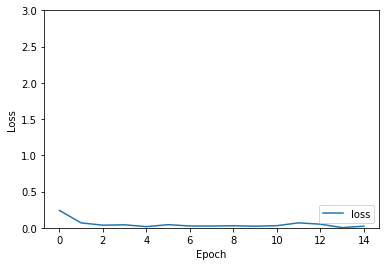

In [ ]:
train_model(model_ft, num_epochs, train_dataloader, optimizer, criterion)

In [ ]:
torch.save(model_ft.state_dict(),  './resnet.pth')

# Testing

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_ft(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

Accuracy of the network: 99.72888888888889 %
